In [46]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay

In [47]:
df = pd.read_csv('heart_disease.csv')

In [48]:
df.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
y = df['target']
X = df.drop('target', axis=1)

In [50]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.10,random_state=101)
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [51]:
# Cs=10 (default)
classifier = LogisticRegressionCV()
classifier.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [52]:
classifier.coef_

array([[-0.09624234, -0.39455733,  0.53541263, -0.13845013, -0.0882132 ,
         0.02495565,  0.08083019,  0.29896895, -0.33440044, -0.35252781,
         0.25100118, -0.49732614, -0.37440968]])

In [53]:
classifier.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [54]:
classifier.C_

array([0.04641589])

In [55]:
y_pred = classifier.predict(scaled_X_test)

In [56]:
accuracy_score(y_test, y_pred)

0.8387096774193549

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [58]:
recall_score(y_test, y_pred)

0.875

In [59]:
precision_score(y_test, y_pred)

0.8235294117647058

In [60]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

In [61]:
f1_score(y_test, y_pred)

0.8484848484848485

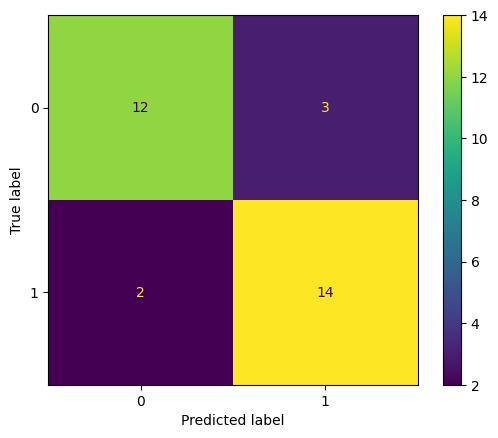

In [62]:
ConfusionMatrixDisplay.from_estimator(estimator=classifier, X=scaled_X_test,
                                      y=y_test)

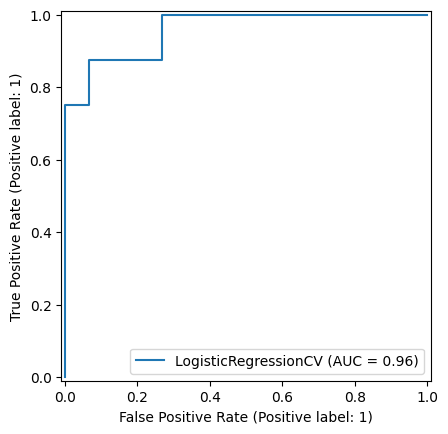

In [63]:
RocCurveDisplay.from_estimator(
    estimator=classifier,
    X=scaled_X_test, y=y_test, response_method='predict_proba'
)

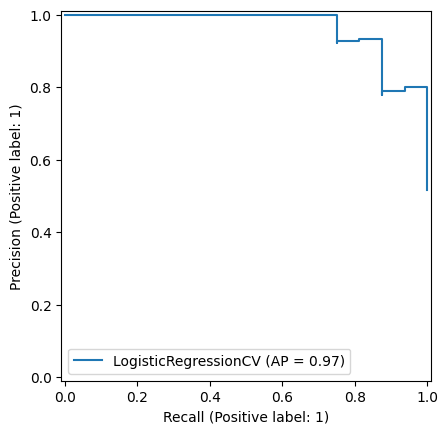

In [64]:
PrecisionRecallDisplay.from_estimator(
    estimator=classifier,
    X=scaled_X_test, y=y_test, response_method='predict_proba'
)